Q1) Linear regression life time model

A company manufactures an electronic device to b used in a very wide temperature range. The company knows that increased temperature shortens teh life time of the device, and a study is therefore performed in which the life time is determined as a function of temperature. The following data is found:

Temperature in celcius (t): 10,20,30,40,50,60,70,80,90

Life time in hours (y): 420, 365, 285, 220, 176, 117, 69, 34, 5

Calculate the 95% confidence interval for the slope in the usual linear regression model, which expresses the life time as a linear function of the temperature.

To provide a visual output, we can create a scatter plot of the data points and overlay the regression line along with the 95% confidence interval bands.

Slope (β1): -5.31
Intercept (β0): 453.56


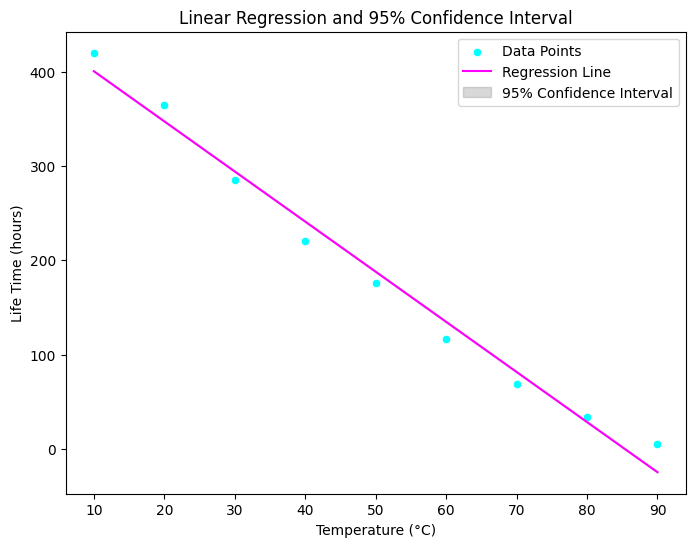

In [ ]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

# Given data
temperature = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
life_time = np.array([420, 365, 285, 220, 176, 117, 69, 34, 5])

# Add a constant term for the intercept
X = sm.add_constant(temperature)

# Fit the linear regression model
model = sm.OLS(life_time, X).fit()

# Get the coefficients
beta0, beta1 = model.params

# Calculate the predicted values (ŷi)
predicted_life_time = model.predict()

# Calculate the residuals (yi - ŷi)
residuals = life_time - predicted_life_time

# Calculate the standard error of the slope
SE_beta1 = np.sqrt(np.sum(residuals ** 2) / (len(temperature) - 2)) / np.sqrt(np.sum((temperature - np.mean(temperature)) ** 2))

# Degrees of freedom (n - 2)
degrees_of_freedom = len(temperature) - 2

# Critical t-value for a 95% confidence interval
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

# Calculate the margin of error
margin_of_error = t_critical * SE_beta1

# Calculate the confidence interval
confidence_interval = (beta1 - margin_of_error, beta1 + margin_of_error)

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=temperature, y=life_time, color='cyan', label='Data Points')

# Plot the regression line
plt.plot(temperature, predicted_life_time, color='magenta', label='Regression Line')

# Plot the 95% confidence interval bands
plt.fill_between(temperature, predicted_life_time - margin_of_error, predicted_life_time + margin_of_error, color='gray', alpha=0.3, label='95% Confidence Interval')

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Life Time (hours)')
plt.title('Linear Regression and 95% Confidence Interval')
plt.legend()

# Print the values of slope and intercept
print(f"Slope (β1): {beta1:.2f}")
print(f"Intercept (β0): {beta0:.2f}")

# Show the plot
plt.show()


Q2) Yield of chemical process

The yield y of a chemical process is a random variable whose value is considered to be a linear function of the temperature x. The following data of corresponding values of x and y is found:
Temperature in degree Celsius (x): 0, 25, 50, 75, 100
Yield in grams (y): 14, 38, 54, 76, 95

Slope (β1): 0.80
Intercept (β0): 15.40


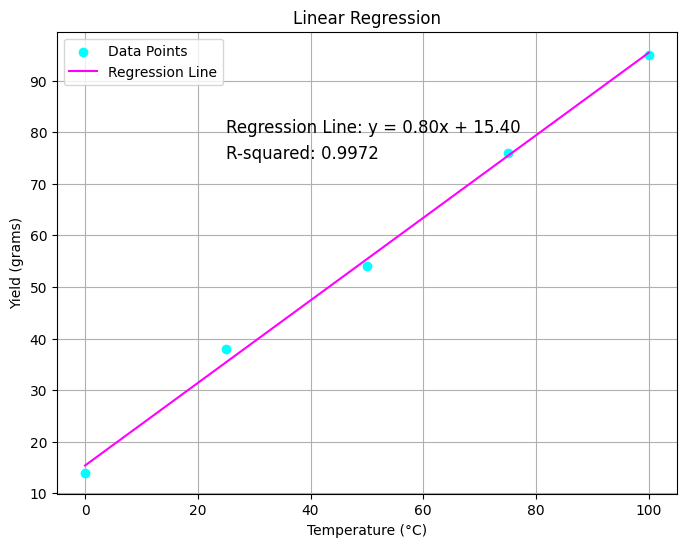

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
temperature = np.array([0, 25, 50, 75, 100])
yield_grams = np.array([14, 38, 54, 76, 95])

# Perform linear regression using NumPy's polyfit function
slope, intercept = np.polyfit(temperature, yield_grams, deg=1)

# Calculate the regression line values
regression_line = slope * temperature + intercept

# Calculate R-squared (coefficient of determination)
residuals = yield_grams - regression_line
ss_total = np.sum((yield_grams - np.mean(yield_grams))**2)
ss_residual = np.sum(residuals**2)
r_squared = 1 - (ss_residual / ss_total)

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(temperature, yield_grams, color='cyan', label='Data Points')
plt.plot(temperature, regression_line, color='magenta', label='Regression Line')

# Add labels, legend, and the regression line equation
plt.xlabel('Temperature (°C)')
plt.ylabel('Yield (grams)')
plt.title('Linear Regression')
plt.legend()
plt.text(25, 80, f"Regression Line: y = {slope:.2f}x + {intercept:.2f}", fontsize=12)
plt.text(25, 75, f"R-squared: {r_squared:.4f}", fontsize=12)

# Print the values of slope and intercept
print(f"Slope (β1): {slope:.2f}")
print(f"Intercept (β0): {intercept:.2f}")

# Show the plot
plt.grid(True)
plt.show()



Q3) The values of y and their corresponding values of y are shown in the table below

x: 0, 1, 2, 3, 4

y: 2, 3, 5, 4, 6

a) Find teh least square regression line y=ax+b

b) Estimate teh value of y when x=10

Slope (β1):  0.90
Intercept (β0): 2.20


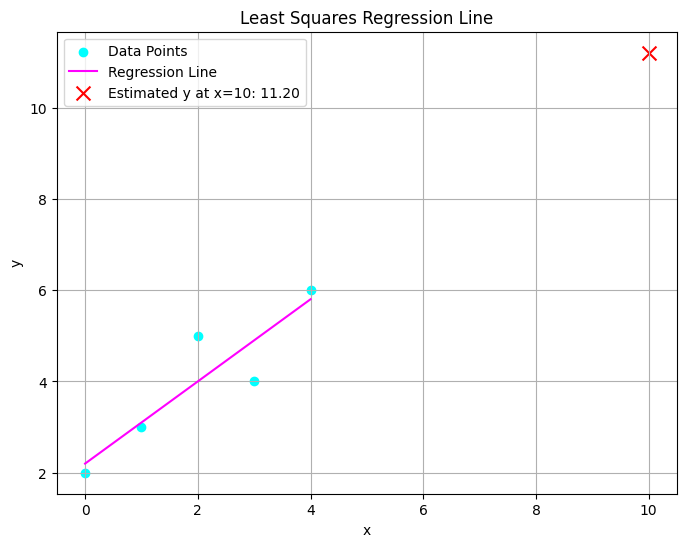

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 3, 5, 4, 6])

# Calculate the regression coefficients (a and b)
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x ** 2)

a = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
b = (sum_y - a * sum_x) / n

# Define the regression line function
def regression_line(x):
    return a * x + b

# Estimate the value of y when x = 10
x_new = 10
y_estimated = regression_line(x_new)

# Create a scatter plot of the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='cyan', label='Data Points')
plt.plot(x, regression_line(x), color='magenta', label='Regression Line')
plt.scatter(x_new, y_estimated, color='red', label=f'Estimated y at x={x_new}: {y_estimated:.2f}', marker='x', s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Regression Line')
plt.legend()
plt.grid(True)

# Print the values of slope and intercept
print(f"Slope (β1):  {a:.2f}")
print(f"Intercept (β0): {b:.2f}")

# Show the plot
plt.show()


Q4) The sales of a company (in million dollars) for each year are shown in the table below

x(year): 2005, 2006, 2007, 2008, 2009

y(sales): 12, 19, 29, 37, 45

a) Find the least square regression line y=ax+b

b) Use the least squares regression line as a model to estimate the sales of the company in 2012.

Slope (β1): 8.40
Intercept (β0): -16830.40


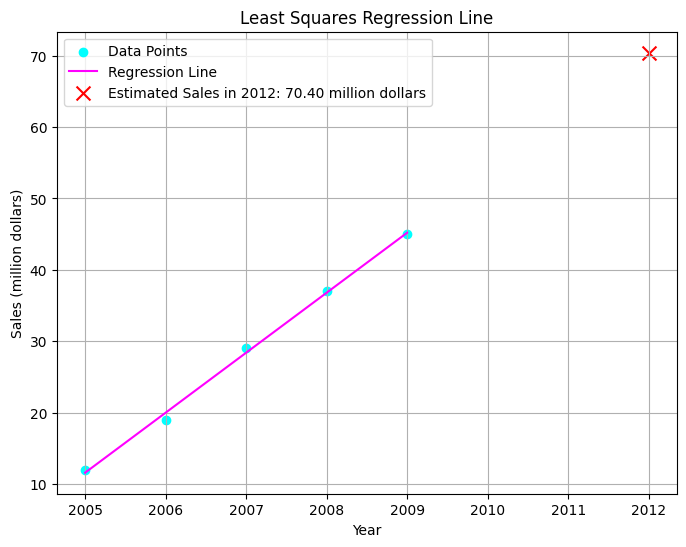

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
year = np.array([2005, 2006, 2007, 2008, 2009])
sales = np.array([12, 19, 29, 37, 45])

# Calculate the regression coefficients (a and b)
n = len(year)
sum_year = np.sum(year)
sum_sales = np.sum(sales)
sum_year_sales = np.sum(year * sales)
sum_year_squared = np.sum(year ** 2)

a = (n * sum_year_sales - sum_year * sum_sales) / (n * sum_year_squared - sum_year ** 2)
b = (sum_sales - a * sum_year) / n

# Define the regression line function
def regression_line(x):
    return a * x + b

# Estimate the sales for the year 2012
year_2012 = 2012
sales_2012_estimated = regression_line(year_2012)

# Create a scatter plot of the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(year, sales, color='cyan', label='Data Points')
plt.plot(year, regression_line(year), color='magenta', label='Regression Line')
plt.scatter(year_2012, sales_2012_estimated, color='red', label=f'Estimated Sales in 2012: {sales_2012_estimated:.2f} million dollars', marker='x', s=100)
plt.xlabel('Year')
plt.ylabel('Sales (million dollars)')
plt.title('Least Squares Regression Line')
plt.legend()
plt.grid(True)

# Print the values of slope and intercept
print(f"Slope (β1): {a:.2f}")
print(f"Intercept (β0): {b:.2f}")

# Show the plot
plt.show()


Q5) You have to study the relationship between the monthly e-commerce sales and the online advertising costs. You have the survey results for 7 online stores for the last year.

Online Store: 1, 2, 3, 4, 5, 6, 7

Monthly E-commerce Sales (in 1000 $):

368, 340, 665, 954, 331, 556, 376

Online Advertising Dollars (1000 $):

1.7, 1.5, 2.8, 5, 1.3, 2.2, 1.3

a) Find the least square regression line y=ax+b

b) Use the least squares regression line as a model to estimate the sales of the company when 8$ spent for advertisement

Slope (β1): 171.47
Intercept (β0): 125.83


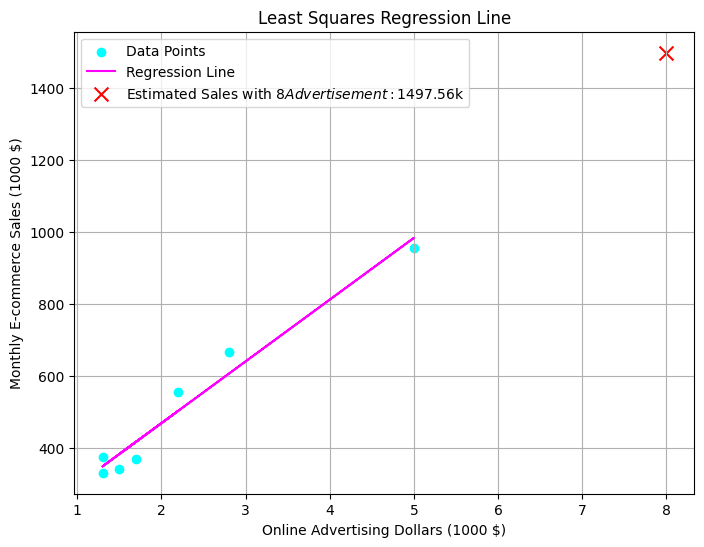

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
online_stores = np.array([1, 2, 3, 4, 5, 6, 7])
e_commerce_sales = np.array([368, 340, 665, 954, 331, 556, 376])
advertising_dollars = np.array([1.7, 1.5, 2.8, 5, 1.3, 2.2, 1.3])

# Calculate the regression coefficients (a and b)
n = len(online_stores)
sum_ads = np.sum(advertising_dollars)
sum_sales = np.sum(e_commerce_sales)
sum_ads_sales = np.sum(advertising_dollars * e_commerce_sales)
sum_ads_squared = np.sum(advertising_dollars ** 2)

a = (n * sum_ads_sales - sum_ads * sum_sales) / (n * sum_ads_squared - sum_ads ** 2)
b = (sum_sales - a * sum_ads) / n

# Define the regression line function
def regression_line(x):
    return a * x + b

# Estimate the sales when $8 is spent on advertisement
ad_spent_8 = 8
sales_estimated_8 = regression_line(ad_spent_8)

# Create a scatter plot of the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(advertising_dollars, e_commerce_sales, color='cyan', label='Data Points')
plt.plot(advertising_dollars, regression_line(advertising_dollars), color='magenta', label='Regression Line')
plt.scatter(ad_spent_8, sales_estimated_8, color='red', label=f'Estimated Sales with $8 Advertisement: ${sales_estimated_8:.2f}k', marker='x', s=100)
plt.xlabel('Online Advertising Dollars (1000 $)')
plt.ylabel('Monthly E-commerce Sales (1000 $)')
plt.title('Least Squares Regression Line')
plt.legend()
plt.grid(True)

# Print the values of slope and intercept
print(f"Slope (β1): {a:.2f}")
print(f"Intercept (β0): {b:.2f}")

# Show the plot
plt.show()
